In [71]:
!pip install pandas
!pip install tldextract
!pip install scikit-learn

In [72]:
# Imports
import pandas as pd
import re
import tldextract
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# Read Data File
file_path = './malicious_phish.csv'

data = pd.read_csv(file_path)
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [74]:
def categorize_type(type):
    if type in ['benign', 'defacement']:
        return 0 # SAFE
    else:
        return 1

# Apply the function to create a new column
data['safety'] = data['type'].apply(categorize_type)
data.head(n=10)

,url,type,safety
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0


In [75]:
def get_length(url):
  return len(url)

data['length'] = data['url'].apply(get_length)
data.head()

,url,type,safety,length
0,br-icloud.com.br,phishing,1,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235


In [76]:
special_chars = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',']

for special_char in special_chars:
  def get_count(url):
    return url.count(special_char)

  data[f'num_{special_char}'] = data['url'].apply(get_count)

data.head()

,url,type,safety,length,num_@,num_?,num_-,num_=,num_.,num_#,num_%,num_+,num_$,num_!,num_*,"num_,"
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,0,0,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,0,0,0,0,0,0


In [77]:
ip_pattern = (
    r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
    r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'
    r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
    r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'
    r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)'
    r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
    r'([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
    r'((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)'
)

def has_ip_address(url):
    return int(re.search(ip_pattern, url, flags=re.I) is not None)

data['Has_IP'] = data['url'].apply(has_ip_address)
data.head()

,url,type,safety,length,num_@,num_?,num_-,num_=,num_.,num_#,num_%,num_+,num_$,num_!,num_*,"num_,",Has_IP
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,0,0,0,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,0,0,0,0,0,0,0


In [78]:
shortening_pattern = r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|' \
                     r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|' \
                     r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|' \
                     r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|' \
                     r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|' \
                     r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|' \
                     r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|' \
                     r'tr\.im|link\.zip\.net'

def has_shortening_service(url):
    return int(re.search(shortening_pattern, url, flags=re.I) is not None)

data['Is_Short'] = data['url'].apply(has_shortening_service)

data.head()

,url,type,safety,length,num_@,num_?,num_-,num_=,num_.,num_#,num_%,num_+,num_$,num_!,num_*,"num_,",Has_IP,Is_Short
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,0,0,0,0,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,0,0,0,0,0,0,0,0


In [79]:
def count_alpha_chars(string):
    return sum(1 for char in string if char.isalpha())

data['alpha'] = data['url'].apply(count_alpha_chars)

def count_numeric_chars(string):
    return sum(1 for char in string if char.isnumeric())

data['numeric'] = data['url'].apply(count_numeric_chars)

data.head()

,url,type,safety,length,num_@,num_?,num_-,num_=,num_.,num_#,num_%,num_+,num_$,num_!,num_*,"num_,",Has_IP,Is_Short,alpha,numeric
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,29,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,25,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,0,0,0,0,0,0,0,0,63,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,0,0,0,0,0,0,0,0,199,22


In [80]:
def has_https(url):
    return int("https" in url)

data['Has_HTTPS'] = data['url'].apply(has_https)

data.head()

,url,type,safety,length,num_@,num_?,num_-,num_=,num_.,num_#,...,num_+,num_$,num_!,num_*,"num_,",Has_IP,Is_Short,alpha,numeric,Has_HTTPS
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,0,0,0,0,29,1,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,0,0,0,0,25,1,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,...,0,0,0,0,0,0,0,63,7,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,...,0,0,0,0,0,0,0,199,22,0


In [81]:
# TLD processing - Avoided using as created too large one hot vector.
"""
tlds = {}
i = 0
with open('tlds.txt', 'r') as file:
    next(file)
    for line in file:
        tlds[line.strip().lower()] = i
        i += 1
"""

"""
def get_tld(url):
    extracted = tldextract.extract(url)
    tld = extracted.suffix.lower()
    return tld

data['TLD'] = data['url'].apply(get_tld)
data.head()



tld_dum = pd.get_dummies(data['TLD'])
data = pd.concat([data, tld_dum], axis=1)
"""

data.head()

,url,type,safety,length,num_@,num_?,num_-,num_=,num_.,num_#,...,num_+,num_$,num_!,num_*,"num_,",Has_IP,Is_Short,alpha,numeric,Has_HTTPS
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,0,0,0,0,29,1,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,0,0,0,0,25,1,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,...,0,0,0,0,0,0,0,63,7,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,...,0,0,0,0,0,0,0,199,22,0


In [82]:
def check_for_code(url):
    if 'javascript:' in url:
        return 1
    if re.search(r'<\s*script', url, re.IGNORECASE):
        return 1
    return 0

data['code'] = data['url'].apply(check_for_code)
data.head()

#data.to_csv('phish_enhanced.csv')

,url,type,safety,length,num_@,num_?,num_-,num_=,num_.,num_#,...,num_$,num_!,num_*,"num_,",Has_IP,Is_Short,alpha,numeric,Has_HTTPS,code
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,...,0,0,0,0,0,0,13,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,0,0,0,29,1,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,0,0,0,25,1,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,1,1,4,3,0,...,0,0,0,0,0,0,63,7,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,1,1,3,2,0,...,0,0,0,0,0,0,199,22,0,0


In [83]:
def false_negatives(predictions, actual_values):
    predictions = np.array(predictions)
    actual_values = np.array(actual_values)

    actual_positive_count = np.sum(actual_values == 1)
    false_negative_count = np.sum((predictions == 0) & (actual_values == 1))

    if actual_positive_count == 0:
        return 0
    else:
        false_negative_percentage = (false_negative_count / actual_positive_count)
        return false_negative_percentage
def false_positives(predictions, actual_values):
    predictions = np.array(predictions)
    actual_values = np.array(actual_values)

    actual_negative_count = np.sum(actual_values == 0)
    false_positive_count = np.sum((predictions == 1) & (actual_values == 0))

    if actual_negative_count == 0:
        return 0
    else:
        false_negative_percentage = (false_positive_count / actual_negative_count)
        return false_negative_percentage

In [84]:
# Drop Data that can't be applied t model
X = data.drop(['url', 'type', 'safety'], axis=1)
y = data['safety']

print("Percentage of data unsafe: ", np.mean(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Percentage of data unsafe:  0.19446061140279888
X_train shape: (520952, 19)
X_test shape: (130239, 19)
y_train shape: (520952,)
y_test shape: (130239,)


In [85]:
# Logistic Regression Testing
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("LogisticRegression Accuracy:", accuracy)
print("Percentage of phishing URLs not caught:", false_negatives(y_pred, y_test))
print("Percentage of benign URLs accidently caught:", false_positives(y_pred, y_test))


LogisticRegression Accuracy: 0.8408003746957516
Percentage of phishing URLs not caught: 0.7810408629241792
Percentage of benign URLs accidently caught: 0.008527523679616929


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)

y_pred_500 = clf.predict(X_test)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred_100 = clf.predict(X_test)

accuracy_100 = accuracy_score(y_test, y_pred_500)
accuracy_500 = accuracy_score(y_test, y_pred_100)
print("RandomForestClassifier Accuracy (100 Estimators):", accuracy_100)
print("Percentage of phishing URLs not caught:", false_negatives(y_pred_100, y_test))
print("Percentage of benign URLs accidently caught:", false_positives(y_pred_100, y_test))

print("RandomForestClassifier Accuracy (500 Estimators):", accuracy_500)
print("Percentage of phishing URLs not caught:", false_negatives(y_pred_500, y_test))
print("Percentage of benign URLs accidently caught:", false_positives(y_pred_500, y_test))



RandomForestClassifier Accuracy (100 Estimators): 0.9198703921252467
Percentage of phishing URLs not caught: 0.27741910085820015
Percentage of benign URLs accidently caught: 0.03253622289840419
RandomForestClassifier Accuracy (500 Estimators): 0.9197014719093359
Percentage of phishing URLs not caught: 0.2779308715849146
Percentage of benign URLs accidently caught: 0.03220237130020889


In [87]:
sgd_classifier = SGDClassifier(random_state=42,alpha=0.01,loss='hinge',max_iter=100000,tol=1e-4)
sgd_classifier.fit(X_train, y_train)
y_pred_sgd_hinge = sgd_classifier.predict(X_test)

sgd_classifier = SGDClassifier(random_state=42,alpha=0.01,loss='perceptron', max_iter=100000,tol=1e-4)
sgd_classifier.fit(X_train, y_train)

y_pred_sgd_perceptron = sgd_classifier.predict(X_test)

accuracy_sgd_hinge = accuracy_score(y_test, y_pred_sgd_hinge)
accuracy_sgd_perceptron = accuracy_score(y_test, y_pred_sgd_perceptron)
print("SGD Classifier Accuracy (Hinge Loss):", accuracy_sgd_hinge)
print("Percentage of phishing URLs not caught:", false_negatives(y_pred_sgd_hinge, y_test))
print("Percentage of benign URLs accidently caught:", false_positives(y_pred_sgd_hinge, y_test))

print("SGD Classifier Accuracy (Perceptron):", accuracy_sgd_perceptron)
print("Percentage of phishing URLs not caught:", false_negatives(y_pred_sgd_perceptron, y_test))
print("Percentage of benign URLs accidently caught:", false_positives(y_pred_sgd_perceptron, y_test))

SGD Classifier Accuracy (Hinge Loss): 0.8417985396079516
Percentage of phishing URLs not caught: 0.7912762774584678
Percentage of benign URLs accidently caught: 0.0048074630140122285
SGD Classifier Accuracy (Perceptron): 0.8354102841698723
Percentage of phishing URLs not caught: 0.6534918510353516
Percentage of benign URLs accidently caught: 0.04612875225349829


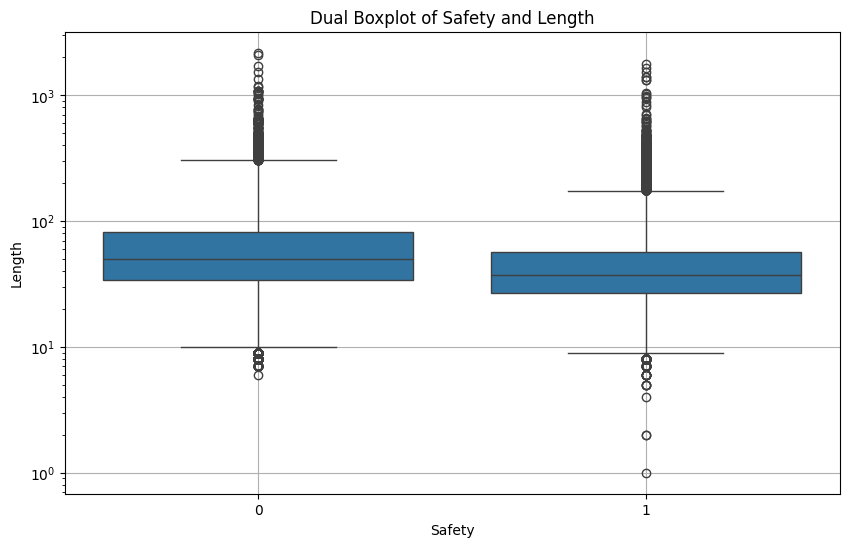

In [94]:
# Boxplot of correlations between length and Safety
plt.figure(figsize=(10, 6))
sns.boxplot(x='safety', y='length', data=data, log_scale=True)

plt.xlabel('Safety')
plt.ylabel('Length')
plt.title('Dual Boxplot of Safety and Length')
plt.grid(True)
plt.show()

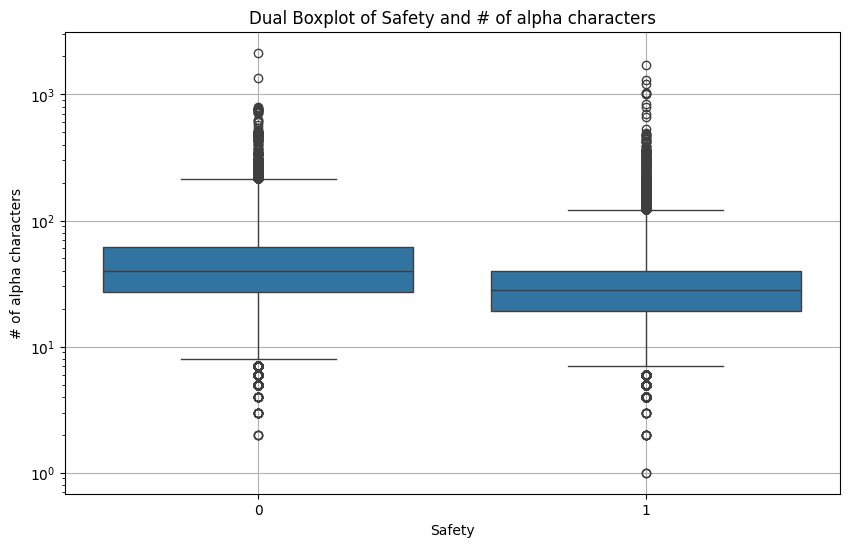

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='safety', y='alpha', data=data, log_scale=True)
plt.xlabel('Safety')
plt.ylabel('# of alpha characters')
plt.title('Dual Boxplot of Safety and # of alpha characters')
plt.grid(True)
plt.show()

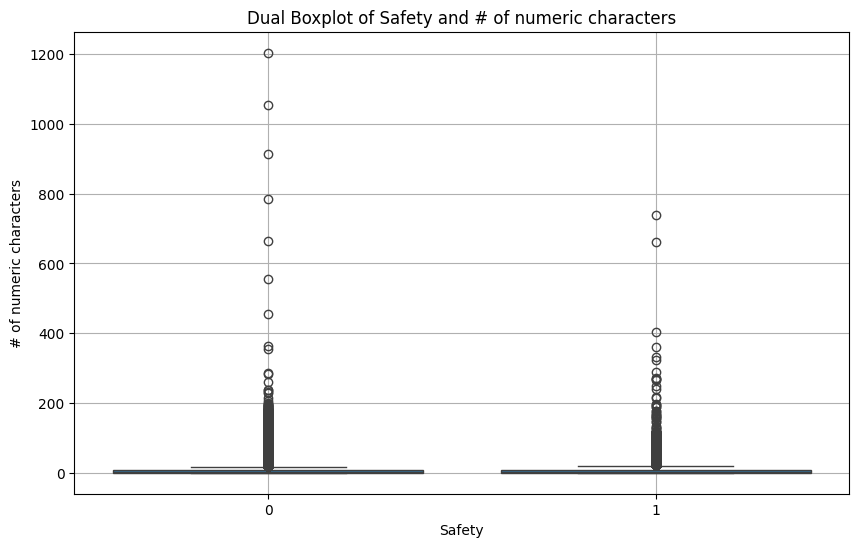

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='safety', y='numeric', data=data)
plt.xlabel('Safety')
plt.ylabel('# of numeric characters')
plt.title('Dual Boxplot of Safety and # of numeric characters')
plt.grid(True)
plt.show()

In [93]:
# Adversial Analysis
num = 0
for idx, row in data.iterrows():
  if row['safety'] == 0:
    continue
  unsafe_sample = row.copy()
  #print(unsafe_sample)
  #print(y_test.loc[idx])

  """
  print('----------')
  print('sample', idx)
  print('----------')
  print('length', unsafe_sample['length'], 'alpha', unsafe_sample['alpha'])
  x_sample = unsafe_sample.drop(['url', 'type', 'safety'])
  res = clf.predict(x_sample.to_frame().T)[0]
  print(['SAFE', 'UNSAFE'][res])
  """
  if unsafe_sample['length'] < 100:
    unsafe_sample['length'] += 100
    unsafe_sample['alpha'] += 100
  else:
    unsafe_sample['alpha'] += unsafe_sample['length']
    unsafe_sample['length'] *= 2

  print('after increasing length by 100:')
  print('length', unsafe_sample['length'], 'alpha', unsafe_sample['alpha'])
  x_sample = unsafe_sample.drop(['url', 'type', 'safety'])
  res = clf.predict(x_sample.to_frame().T)[0]
  print(['SAFE', 'UNSAFE'][res])
  print()

Streaming output truncated to the last 5000 lines.
SAFE

after increasing length by 100:
length 126 alpha 123
SAFE

after increasing length by 100:
length 119 alpha 115
SAFE

after increasing length by 100:
length 187 alpha 153
SAFE

after increasing length by 100:
length 208 alpha 182
SAFE

after increasing length by 100:
length 132 alpha 128
SAFE

after increasing length by 100:
length 165 alpha 147
SAFE

after increasing length by 100:
length 115 alpha 114
UNSAFE

after increasing length by 100:
length 112 alpha 111
UNSAFE

after increasing length by 100:
length 189 alpha 166
SAFE

after increasing length by 100:
length 169 alpha 137
SAFE

after increasing length by 100:
length 124 alpha 118
SAFE

after increasing length by 100:
length 169 alpha 151
SAFE

after increasing length by 100:
length 112 alpha 109
SAFE

after increasing length by 100:
length 194 alpha 166
UNSAFE

after increasing length by 100:
length 172 alpha 125
SAFE

after increasing length by 100:
length 199 alpha 135

KeyboardInterrupt: 